In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [ ]:
x=df.iloc[: ,2:4].values
y=df.iloc[: ,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(
    criterion="entropy",#(OR)criterion="gini" use gini it is fast
    max_depth=4,
    random_state=42
)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [ ]:
y_pred=classifier.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9125
[[47  5]
 [ 2 26]]


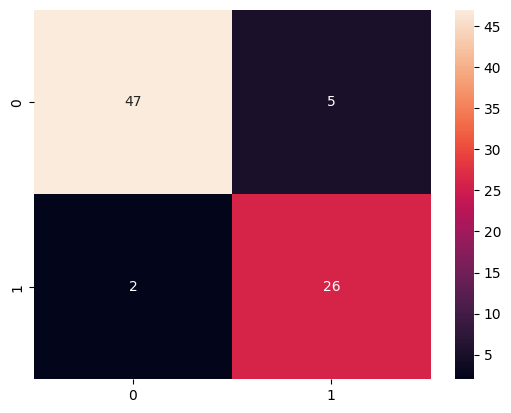

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.show()

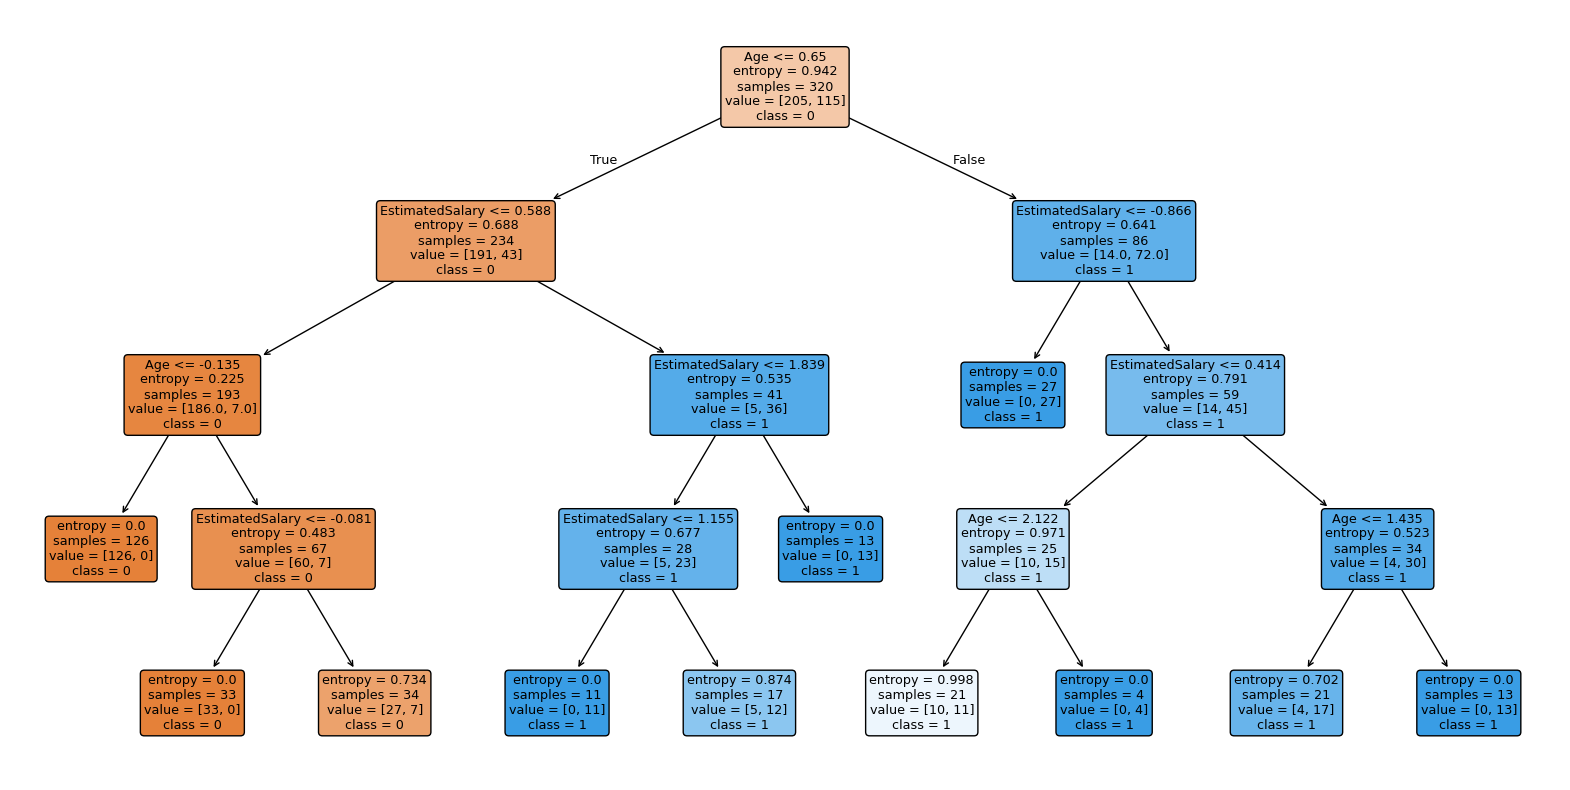

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(classifier,
          feature_names=df.columns[2:4],
          class_names=["0","1"],
          filled=True,
          rounded=True
          )
plt.show()